# Paket Prabayar Megaline

## Daftar Isi
- Pendahuluan
- Tahap 1. Prapemrosesan Data
     - 1.1 Memuat Data
      - 1.2 Data Pengguna Setiap Bulan
       - 1.2.1 Menggabungkan Data Hasil
       - 1.2.2 Menghitung Paket Pengguna
       - 1.2.3 Additional Revenue
       - 1.2.4 Total Revenue
- Tahap 2. Analisis Data
     - 2.1 Perilaku Pengguna
      - 2.2 Menghitung Rata-rata
      - 2.3 Menghitung Varians
      - 2.4 Menghitung Standar Deviasi
      - 2.5 Membuat Histogram
- Tahap 3. Menguji Hipotesis
     - 3.1 Hipotesis Pengguna Paket Surf dan Ultimate
     - 3.2 Hipotesis Wilayah NY-NJ
- Tahap 4. Kesimpulan


### Pendahuluan
Ini adalah analisis mengenai operator telekomunikasi yang bernama Megaline. Perusahaan ini menawarkan kliennya dua paket prabayar, Surf dan Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan.

Analisis awal untuk paket-paket prabayar tersebut dilakukan berdasarkan sampel klien yang berukuran relatif kecil. Data ini memiliki 500 data klien Megaline yang memiliki informasi mengenai siapa mereka, dari mana mereka, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Saya akan menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan.

### Tujuan
Menguji dua hipotesis :
 1. Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
 2. Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

### Tahapan
Data klien Megaline disimpan dalam berkas berikut:
- /datasets/megaline_calls.csv
- /datasets/megaline_internet.csv
- /datasets/megaline_messages.csv
- /datasets/megaline_plans.csv
- /datasets/megaline_users.csv


Saya akan melakukan pengevaluasian data dan melakukan pembersihan serta merapikan data yang dibutuhkan.

## Tahap 1. Pra-pemrosesan Data
### Mengimpor Library

In [1]:
#mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st

### Memuat Data

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

#### Dataset Calls

Tabel `calls` (data panggilan):

- *id* — ID sesi web unik
- *call_date* — tanggal panggilan
- *duration* — durasi panggilan (dalam menit)
- *user_id* — ID pengguna yang melakukan panggilan

In [3]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
# mengecek nilai yang hilang
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [5]:
# mengecek duplikat
calls.duplicated().sum()

0

In [6]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Tidak ada nilai yang hilang dan nilai duplikat dalam dataset ini.

#### Dataset Internet

Tabel `internet` (data sesi web):

- *id* — ID sesi web unik
- *mb_used* — volume data yang dihabiskan selama sesi (dalam megabita)
- *session_date* — tanggal sesi web
- *user_id* — ID pengguna

In [7]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [8]:
# mengecek nilai yang hilang
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [9]:
# mengecek duplikat
internet.duplicated().sum()

0

In [10]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


Tidak ada nilai yang hilang dan nilai duplikat dalam dataset ini.

#### Dataset Messages

Tabel `messages` (data SMS):

- *id* — ID SMS unik
- *message_date* — tanggal SMS dikirim
- *user_id* — ID pengguna yang mengirim SMS

In [11]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [12]:
# mengecek nilai yang hilang
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [13]:
# mengecek duplikat
messages.duplicated().sum()

0

In [14]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


Tidak ada nilai yang hilang dan nilai duplikat dalam dataset ini.

#### Dataset Plans

Tabel `plans` (data paket telepon):

- *plan_name* — nama paket telepon
- *usd_monthly_fee* — biaya bulanan dalam dolar AS
- *minutes_included* — alokasi menit panggilan bulanan
- *messages_included* — alokasi SMS bulanan
- *mb_per_month_included* — alokasi volume data bulanan (dalam megabita)
- *usd_per_minute* — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
- *usd_per_message* — harga per SMS jika telah melebihi batas alokasi paket
- *usd_per_gb* — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

In [15]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [16]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


Dataset plans hanya terdiri dari 2 baris yang memuat informasi mengenai paket surf dan ultimate.

#### Dataset Users

Tabel `users` (data pengguna):

- *user_id* — ID pengguna
- *first_name* — nama depan pengguna
- *last_name* — nama belakang pengguna
- *age* — usia pengguna (tahun)
- *reg_date* — tanggal mulai berlangganan (dd, mm, yy)
- *churn_date* — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
- *city* — kota tempat tinggal pengguna
- *plan* — nama paket telepon

In [17]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [18]:
# mengecek nilai yang hilang
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [19]:
# mengecek duplikat
users.duplicated().sum()

0

In [20]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


Terdapat nilai yang hilang pada kolom 'churn_date' (tanggal pengguna berhenti menggunakan layanan), ini bisa jadi berarti paket layanan data sedang digunakan saat data ini dibuat. 

Durasi 0.00  menit berarti panggilan yang dilakukan tidak terjawab, jumlahnya pun cukup banyak yaitu 7482 panggilan.

### Data Pengguna Setiap Bulan
Megaline membulatkan detik ke menit, serta megabyte ke gigabyte. Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika suatu panggilan berlangsung hanya satu detik, ia akan dihitung sebagai satu menit. Untuk lalu lintas web, setiap sesi web individual tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabyte bulan ini, maka ia akan dikenai biaya untuk 2 gigabyte.

Berikut jumlah panggilan, menit panggilan, jumlah sms dan volume data yang digunakan pengguna setiap bulannya.

In [21]:
#pembulatan detik menjadi menit dan merubah tipe data menjadi integer
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)

In [22]:
calls['year_month'] = pd.to_datetime(calls['call_date']).dt.to_period('M')

#### Total Jumlah Panggilan dan Menit Panggilan

In [23]:
# jumlah panggilan dan menit panggilan yang dilakukan pengguna per bulan
call_total = calls.pivot_table(index=['user_id', 'year_month'], values='duration', aggfunc=['count','sum'])
call_total.columns = ['call_count', 'total_duration']
call_total.reset_index()

,user_id,year_month,call_count,total_duration
0,1000,2018-12,16,124
1,1001,2018-08,27,182
2,1001,2018-09,49,315
3,1001,2018-10,65,393
4,1001,2018-11,64,426
...,...,...,...,...
2253,1498,2018-12,39,339
2254,1499,2018-09,41,346
2255,1499,2018-10,53,385
2256,1499,2018-11,45,308


Total durasi panggilan yang dilakukan, rata-rata berada di kisaran 400 menit.

#### Total Volume Data

In [24]:
internet['year_month'] = pd.to_datetime(internet['session_date']).dt.to_period('M')

In [25]:
data_used = internet.pivot_table(index=['user_id', 'year_month'], values='mb_used', aggfunc='sum')
data_used.columns = ['total_mb']
data_used.reset_index()

,user_id,year_month,total_mb
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


In [26]:
# membagi data mb menjadi gb, melakukan pembulatan nilai data mb menjadi gb, merubah tipenya menjadi integer
data_used['total_gb'] = (data_used['total_mb']/1024).apply(np.ceil).astype(int)
print(data_used['total_gb'])

user_id  year_month
1000     2018-12        2
1001     2018-08        7
         2018-09       14
         2018-10       22
         2018-11       19
                       ..
1498     2018-12       23
1499     2018-09       13
         2018-10       20
         2018-11       17
         2018-12       22
Name: total_gb, Length: 2277, dtype: int64


Total penggunaan data internet yang dilakukan pengguna rata-rata berada di sekitar 18 GB.

#### Total Jumlah SMS

In [27]:
# membuat kolom baru year_month untuk menghitung per bulan
messages['year_month'] = pd.to_datetime(messages['message_date']).dt.to_period('M')

In [28]:
# jumlah sms yang dikirim per bulan
message_total = messages.pivot_table(index=['user_id', 'year_month'], values='message_date', aggfunc='count')
message_total.columns = ['total_sms']
message_total.reset_index()

,user_id,year_month,total_sms
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


Rata-rata total sms yang dikirimkan pengguna adalah sekitar 40 sms.

#### Menggabungan Data Hasil Perhitungan
Menggabungkan hasil perhitungan data pengguna per bulan.

In [29]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [30]:
# menggabungkan dataset utama menjadi satu
df1 = call_total.merge(data_used,on=['user_id', 'year_month'], how='outer')
df2 = df1.merge(message_total, on=['user_id','year_month'], how='outer')
df2 = df2.reset_index()
df3 = df2.merge(users)
plan = users[['user_id', 'plan']]
df4 = df3.merge(plan, on='user_id',how='outer')
df = df4.merge(users).reset_index()

In [31]:
#menampilkan dataset
df

,index,user_id,year_month,call_count,total_duration,total_mb,total_gb,total_sms,first_name,last_name,age,city,reg_date,plan_x,churn_date,plan_y,plan
0,0,1000,2018-12,16.0,124.0,1901.47,2.0,11.0,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,ultimate,ultimate
1,1,1001,2018-08,27.0,182.0,6919.15,7.0,30.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,surf,surf
2,2,1001,2018-09,49.0,315.0,13314.82,14.0,44.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,surf,surf
3,3,1001,2018-10,65.0,393.0,22330.49,22.0,53.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,surf,surf
4,4,1001,2018-11,64.0,426.0,18504.30,19.0,36.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,surf,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2288,1204,2018-11,NaN,NaN,21346.95,21.0,42.0,Sherly,Levy,44.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaN,ultimate,ultimate
2289,2289,1204,2018-12,NaN,NaN,36730.05,36.0,78.0,Sherly,Levy,44.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaN,ultimate,ultimate
2290,2290,1349,2018-10,NaN,NaN,13093.55,13.0,76.0,Florentina,Diaz,69.0,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,surf,surf
2291,2291,1349,2018-11,NaN,NaN,17128.26,17.0,72.0,Florentina,Diaz,69.0,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,surf,surf


Diatas saya menggabungkan datasets menggunakan merge berdasarkan kolom tertentu, yaitu kolom 'user_id', 'year_month' , dan 'plan'.

Karena banyak nilai nan pada kolom churndate dan kolom lain karena paket sedang digunakan, maka akan diganti dengan nilai 0.

In [32]:
# mengganti nilai nan dengan nol dan menampilkan dataset
df = df.fillna(0)
df

,index,user_id,year_month,call_count,total_duration,total_mb,total_gb,total_sms,first_name,last_name,age,city,reg_date,plan_x,churn_date,plan_y,plan
0,0,1000,2018-12,16.0,124.0,1901.47,2.0,11.0,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,ultimate,ultimate
1,1,1001,2018-08,27.0,182.0,6919.15,7.0,30.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,surf,surf
2,2,1001,2018-09,49.0,315.0,13314.82,14.0,44.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,surf,surf
3,3,1001,2018-10,65.0,393.0,22330.49,22.0,53.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,surf,surf
4,4,1001,2018-11,64.0,426.0,18504.30,19.0,36.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,surf,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2288,1204,2018-11,0.0,0.0,21346.95,21.0,42.0,Sherly,Levy,44.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,0,ultimate,ultimate
2289,2289,1204,2018-12,0.0,0.0,36730.05,36.0,78.0,Sherly,Levy,44.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,0,ultimate,ultimate
2290,2290,1349,2018-10,0.0,0.0,13093.55,13.0,76.0,Florentina,Diaz,69.0,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,0,surf,surf
2291,2291,1349,2018-11,0.0,0.0,17128.26,17.0,72.0,Florentina,Diaz,69.0,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,0,surf,surf


#### Menghitung Paket Pengguna

In [33]:
# melihat keterangan paket surf dan ultimate
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


##### Paket Telepon
Paket Surf :
500 menit panggilan per bulan, bila melebihi batas paket dikenakan biaya 3 sen untuk per menitnya.

Paket ultimate :
3000 menit panggilan per bulan, bila melebihi batas paket akan dikenakan biaya 1 sen untuk per menitnya.

In [34]:
# Menghitung durasi panggilan tambahan untuk pengguna paket surf dan ultimate
df['add_duration'] =(df['total_duration']-500).where(cond= df['plan']=="surf", other = df['total_duration']-3000)

##### Paket Internet
Paket Surf : 15 GB per bulan, bila melebihi batas paket dikenakan biaya 10$ untuk setiap 1 GB.

Paket Ultimate : 30 GB per bulan, bila melebihi batas paket akan dikenakan biaya 7$ untuk setiap 1 GB.

In [35]:
# Menghitung kuota tambahan untuk pengguna paket surf dan ultimate
df['add_internet'] =(df['total_gb']-15).where(cond= df['plan']=="surf", other = df['total_gb']-30)

##### Paket SMS
Paket SMS Surf : 50 SMS per bulan, bila melebihi batas paket akan dikenakan biaya 3 sen per SMS.

Paket Ultimate : 1000 SMS per bulan, jika melebihi batas paket akan dikenakan biaya sebesar 1 sen per SMS.

In [36]:
# Menghitung sms tambahan untuk pengguna paket surf dan ultimate
df['add_sms'] =(df['total_sms']-50).where(cond= df['plan']=="surf", other = df['total_sms']-1000)

In [37]:
# menampilkan dataset setelah menghitung tambahan durasi panggilan, internet dan sms
df

,index,user_id,year_month,call_count,total_duration,total_mb,total_gb,total_sms,first_name,last_name,age,city,reg_date,plan_x,churn_date,plan_y,plan,add_duration,add_internet,add_sms
0,0,1000,2018-12,16.0,124.0,1901.47,2.0,11.0,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,ultimate,ultimate,-2876.0,-28.0,-989.0
1,1,1001,2018-08,27.0,182.0,6919.15,7.0,30.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,surf,surf,-318.0,-8.0,-20.0
2,2,1001,2018-09,49.0,315.0,13314.82,14.0,44.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,surf,surf,-185.0,-1.0,-6.0
3,3,1001,2018-10,65.0,393.0,22330.49,22.0,53.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,surf,surf,-107.0,7.0,3.0
4,4,1001,2018-11,64.0,426.0,18504.30,19.0,36.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,surf,surf,-74.0,4.0,-14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2288,1204,2018-11,0.0,0.0,21346.95,21.0,42.0,Sherly,Levy,44.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,0,ultimate,ultimate,-3000.0,-9.0,-958.0
2289,2289,1204,2018-12,0.0,0.0,36730.05,36.0,78.0,Sherly,Levy,44.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,0,ultimate,ultimate,-3000.0,6.0,-922.0
2290,2290,1349,2018-10,0.0,0.0,13093.55,13.0,76.0,Florentina,Diaz,69.0,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,0,surf,surf,-500.0,-2.0,26.0
2291,2291,1349,2018-11,0.0,0.0,17128.26,17.0,72.0,Florentina,Diaz,69.0,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,0,surf,surf,-500.0,2.0,22.0


Terdapat nilai minus dari hasil perhitungan diatas, nilai minus ini akan diganti di bagian bawah setelah menghitung keseluruhan biaya.

#### Additional Revenue
Setelah menghitung jumlah durasi, internet dan sms tambahan untuk pengguna yang menggunakan layanan lebih dari batas paket, selanjutnya kita akan menghitung biaya tambahannya.

##### Paket Telepon
Paket Surf :
Bila melebihi batas paket dikenakan biaya 3 sen untuk per menitnya.

Paket ultimate :
Bila melebihi batas paket akan dikenakan biaya 1 sen untuk per menitnya.

In [38]:
# menghitung biaya tambahan untuk menit panggilan paket surf dan ultimate
df['duration_charge'] = (df['add_duration']*0.03).where(cond= df['plan']=="surf", other = df['add_duration']*0.01)

##### Paket Internet
Paket Surf :
Bila melebihi batas paket dikenakan biaya 10$ untuk setiap 1 GB.

Paket Ultimate : 
Bila melebihi batas paket akan dikenakan biaya 7$ untuk setiap 1 GB.

In [39]:
# menghitung biaya tambahan untuk kuota internet paket surf dan ultimate
df['internet_charge'] = (df['add_internet']*10).where(cond= df['plan']=="surf", other = df['add_internet']*7)

##### Paket SMS
Paket Surf : 
Bila melebihi batas paket akan dikenakan biaya 3 sen per SMS.

Paket Ultimate : 
Bila melebihi batas paket akan dikenakan biaya sebesar 1 sen per SMS.

In [40]:
# menghitung biaya tambahan untuk sms paket surf dan ultimate
df['sms_charge'] = (df['add_sms']*0.03).where(cond= df['plan']=="surf", other = df['add_internet']*0.01)

In [41]:
# menampilkan dataset setelah menghitung biaya tambahan
df

,index,user_id,year_month,call_count,total_duration,total_mb,total_gb,total_sms,first_name,last_name,...,plan_x,churn_date,plan_y,plan,add_duration,add_internet,add_sms,duration_charge,internet_charge,sms_charge
0,0,1000,2018-12,16.0,124.0,1901.47,2.0,11.0,Anamaria,Bauer,...,ultimate,0,ultimate,ultimate,-2876.0,-28.0,-989.0,-28.76,-196.0,-0.28
1,1,1001,2018-08,27.0,182.0,6919.15,7.0,30.0,Mickey,Wilkerson,...,surf,0,surf,surf,-318.0,-8.0,-20.0,-9.54,-80.0,-0.60
2,2,1001,2018-09,49.0,315.0,13314.82,14.0,44.0,Mickey,Wilkerson,...,surf,0,surf,surf,-185.0,-1.0,-6.0,-5.55,-10.0,-0.18
3,3,1001,2018-10,65.0,393.0,22330.49,22.0,53.0,Mickey,Wilkerson,...,surf,0,surf,surf,-107.0,7.0,3.0,-3.21,70.0,0.09
4,4,1001,2018-11,64.0,426.0,18504.30,19.0,36.0,Mickey,Wilkerson,...,surf,0,surf,surf,-74.0,4.0,-14.0,-2.22,40.0,-0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2288,1204,2018-11,0.0,0.0,21346.95,21.0,42.0,Sherly,Levy,...,ultimate,0,ultimate,ultimate,-3000.0,-9.0,-958.0,-30.00,-63.0,-0.09
2289,2289,1204,2018-12,0.0,0.0,36730.05,36.0,78.0,Sherly,Levy,...,ultimate,0,ultimate,ultimate,-3000.0,6.0,-922.0,-30.00,42.0,0.06
2290,2290,1349,2018-10,0.0,0.0,13093.55,13.0,76.0,Florentina,Diaz,...,surf,0,surf,surf,-500.0,-2.0,26.0,-15.00,-20.0,0.78
2291,2291,1349,2018-11,0.0,0.0,17128.26,17.0,72.0,Florentina,Diaz,...,surf,0,surf,surf,-500.0,2.0,22.0,-15.00,20.0,0.66


Karena banyak nilai minus pada beberapa kolom, saya memutuskan untuk mengubahnya menjadi nol.

In [42]:
# mengubah nilai negatif menjadi nol
num = df['add_duration']._get_numeric_data()
num[num < 0] = 0
num = df['add_internet']._get_numeric_data()
num[num < 0] = 0
num = df['add_sms']._get_numeric_data()
num[num < 0] = 0
num = df['duration_charge']._get_numeric_data()
num[num < 0] = 0
num = df['internet_charge']._get_numeric_data()
num[num < 0] = 0
num = df['sms_charge']._get_numeric_data()
num[num < 0] = 0

# menampilkan dataset setelah menghitung biaya tambahan dan mengganti nilai minus dengan nol
df

,index,user_id,year_month,call_count,total_duration,total_mb,total_gb,total_sms,first_name,last_name,...,plan_x,churn_date,plan_y,plan,add_duration,add_internet,add_sms,duration_charge,internet_charge,sms_charge
0,0,1000,2018-12,16.0,124.0,1901.47,2.0,11.0,Anamaria,Bauer,...,ultimate,0,ultimate,ultimate,0.0,0.0,0.0,0.0,0.0,0.00
1,1,1001,2018-08,27.0,182.0,6919.15,7.0,30.0,Mickey,Wilkerson,...,surf,0,surf,surf,0.0,0.0,0.0,0.0,0.0,0.00
2,2,1001,2018-09,49.0,315.0,13314.82,14.0,44.0,Mickey,Wilkerson,...,surf,0,surf,surf,0.0,0.0,0.0,0.0,0.0,0.00
3,3,1001,2018-10,65.0,393.0,22330.49,22.0,53.0,Mickey,Wilkerson,...,surf,0,surf,surf,0.0,7.0,3.0,0.0,70.0,0.09
4,4,1001,2018-11,64.0,426.0,18504.30,19.0,36.0,Mickey,Wilkerson,...,surf,0,surf,surf,0.0,4.0,0.0,0.0,40.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2288,1204,2018-11,0.0,0.0,21346.95,21.0,42.0,Sherly,Levy,...,ultimate,0,ultimate,ultimate,0.0,0.0,0.0,0.0,0.0,0.00
2289,2289,1204,2018-12,0.0,0.0,36730.05,36.0,78.0,Sherly,Levy,...,ultimate,0,ultimate,ultimate,0.0,6.0,0.0,0.0,42.0,0.06
2290,2290,1349,2018-10,0.0,0.0,13093.55,13.0,76.0,Florentina,Diaz,...,surf,0,surf,surf,0.0,0.0,26.0,0.0,0.0,0.78
2291,2291,1349,2018-11,0.0,0.0,17128.26,17.0,72.0,Florentina,Diaz,...,surf,0,surf,surf,0.0,2.0,22.0,0.0,20.0,0.66


Semua perhitungan jumlah lebih durasi panggilan, internet dan sms serta biaya tambahannya telah selesai dihitung, selanjutnya kita akan menjumlahkan semuanya dengan harga paket per bulan untuk setiap pengguna. 

#### Total Revenue
Setelah menghitung biaya tambahan untuk kedua paket, mari jumlahkan biaya tambahan tersebut dengan biaya paket per bulan.

In [43]:
df['additional_charge'] = df['duration_charge'] + df['internet_charge'] + df['sms_charge']
df['total_revenue'] = (20+df['additional_charge']).where(cond= df['plan']=="surf", other = 70+df['additional_charge'])

In [44]:
df

,index,user_id,year_month,call_count,total_duration,total_mb,total_gb,total_sms,first_name,last_name,...,plan_y,plan,add_duration,add_internet,add_sms,duration_charge,internet_charge,sms_charge,additional_charge,total_revenue
0,0,1000,2018-12,16.0,124.0,1901.47,2.0,11.0,Anamaria,Bauer,...,ultimate,ultimate,0.0,0.0,0.0,0.0,0.0,0.00,0.00,70.00
1,1,1001,2018-08,27.0,182.0,6919.15,7.0,30.0,Mickey,Wilkerson,...,surf,surf,0.0,0.0,0.0,0.0,0.0,0.00,0.00,20.00
2,2,1001,2018-09,49.0,315.0,13314.82,14.0,44.0,Mickey,Wilkerson,...,surf,surf,0.0,0.0,0.0,0.0,0.0,0.00,0.00,20.00
3,3,1001,2018-10,65.0,393.0,22330.49,22.0,53.0,Mickey,Wilkerson,...,surf,surf,0.0,7.0,3.0,0.0,70.0,0.09,70.09,90.09
4,4,1001,2018-11,64.0,426.0,18504.30,19.0,36.0,Mickey,Wilkerson,...,surf,surf,0.0,4.0,0.0,0.0,40.0,0.00,40.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2288,1204,2018-11,0.0,0.0,21346.95,21.0,42.0,Sherly,Levy,...,ultimate,ultimate,0.0,0.0,0.0,0.0,0.0,0.00,0.00,70.00
2289,2289,1204,2018-12,0.0,0.0,36730.05,36.0,78.0,Sherly,Levy,...,ultimate,ultimate,0.0,6.0,0.0,0.0,42.0,0.06,42.06,112.06
2290,2290,1349,2018-10,0.0,0.0,13093.55,13.0,76.0,Florentina,Diaz,...,surf,surf,0.0,0.0,26.0,0.0,0.0,0.78,0.78,20.78
2291,2291,1349,2018-11,0.0,0.0,17128.26,17.0,72.0,Florentina,Diaz,...,surf,surf,0.0,2.0,22.0,0.0,20.0,0.66,20.66,40.66


## Tahap 2. Analisis Data

### Perilaku Pengguna

- Secara keseluruhan, dilihat dari total jumlah menit yang melebihi batas paket (500 menit), sebagian pengguna merasa kurang dengan paket yang diberikan, tetapi jika pengguna surf mengganti ke paket ultimate (3000 menit) sepertinya akan terlalu banyak jumlah menit yang diberikan. Karena total nilai menit pengguna paket berada pada maksimum  1510 menit.
- Hal yang sama dengan total jumlah sms yang melebihi batas paket (50 sms), jika sebagian pengguna beralih ke paket ultimate (1000 sms), akan ada terlalu banyak jumlah sms yang diberikan untuk pengguna paket surf.
- Untuk total jumlah internet, sepertinya ada sebagian yang melebihi batas paket, namun jika dilihat dari totalnya, pemakaian yang dibutuhkan sebagian pengguna tidak sebanyak kuota yang diberikan dalam paket ultimate (30 GB).

In [45]:
df.loc[(df['plan'] == 'surf')].max()

index                                                            2292
user_id                                                          1499
year_month                                                    2018-12
call_count                                                      205.0
total_duration                                                 1510.0
total_mb                                                     70931.59
total_gb                                                         70.0
total_sms                                                       266.0
first_name                                                       Zane
last_name                                                   Zimmerman
age                                                              75.0
city                 Washington-Arlington-Alexandria, DC-VA-MD-WV MSA
reg_date                                                   2018-12-30
plan_x                                                           surf
plan_y              

In [46]:
df.loc[(df['plan'] == 'ultimate')].max()

index                                                            2289
user_id                                                          1497
year_month                                                    2018-12
call_count                                                      191.0
total_duration                                                 1369.0
total_mb                                                     46595.33
total_gb                                                         46.0
total_sms                                                       166.0
first_name                                                      Zofia
last_name                                                        Wynn
age                                                              75.0
city                 Washington-Arlington-Alexandria, DC-VA-MD-WV MSA
reg_date                                                   2018-12-30
plan_x                                                       ultimate
plan_y              

### Menghitung Rata-rata

Menghitung nilai rata-rata durasi telp, internet dan sms untuk setiap paket.

**Nilai Rata-rata Paket Telepon**

In [47]:
# menghitung rata-rata durasi telp surf
np.mean(df.query('plan == "surf"')['total_duration'])

428.7495232040687

In [48]:
# menghitung rata-rata durasi telp ultimate
np.mean(df.query('plan == "ultimate"')['total_duration'])

430.45

**Nilai Rata-rata Paket Internet**

In [49]:
# menghitung rata-rata kuota internet surf
np.mean(df.query('plan == "surf"')['total_gb'])

16.670692943420217

In [50]:
# menghitung rata-rata kuota internet ultimate
np.mean(df.query('plan == "ultimate"')['total_gb'])

17.306944444444444

**Nilai Rata-rata Paket SMS**

In [51]:
# menghitung rata-rata sms paket surf
np.mean(df.query('plan == "surf"')['total_sms'])

31.15956770502225

In [52]:
# menghitung rata-rata sms paket ultimate
np.mean(df.query('plan == "ultimate"')['total_sms'])

37.55138888888889

### Menghitung Varians

**Nilai Varians Paket Telepon**

In [53]:
# menghitung varians telp paket surf
np.var(df.query('plan == "surf"')['total_duration'])

54933.334591317485

In [54]:
# menghitung varians telp paket ultimate
np.var(df.query('plan == "ultimate"')['total_duration'])

57764.125277777785

**Nilai Varians Paket Internet**

In [55]:
# menghitung varians kuota internet surf
np.var(df.query('plan == "surf"')['total_gb'])

61.54444942447023

In [56]:
# menghitung rata-rata kuota internet ultimate
np.var(df.query('plan == "ultimate"')['total_gb'])

58.748840663580246

**Nilai Varians Paket SMS**

In [57]:
# menghitung varians sms paket surf
np.var(df.query('plan == "surf"')['total_sms'])

1126.008231726662

In [58]:
# menghitung varians sms paket ultimate
np.var(df.query('plan == "ultimate"')['total_sms'])

1207.0779147376543

### Menghitung Standar Deviasi

**Nilai Standar Deviasi Paket Telepon**

In [59]:
# menghitung std durasi panggilan paket surf
np.std(df.query('plan == "surf"')['total_duration'])

234.37861376695076

In [60]:
# menghitung std durasi panggilan paket ultimate
np.std(df.query('plan == "ultimate"')['total_duration'])

240.34168443650756

**Nilai Standar Deviasi Paket Internet**

In [61]:
# menghitung std kuota internet paket surf
np.std(df.query('plan == "surf"')['total_gb'])

7.845027050588814

In [62]:
# menghitung std durasi panggilan paket ultimate
np.std(df.query('plan == "ultimate"')['total_gb'])

7.664779231235578

**Nilai Standar Deviasi Paket SMS**

In [63]:
# menghitung std sms paket surf
np.std(df.query('plan == "surf"')['total_sms'])

33.556046127734746

In [64]:
# menghitung std sms paket ultimate
np.std(df.query('plan == "ultimate"')['total_sms'])

34.743026850544474

###  Membuat Histogram

#### Histogram Total Duration

Text(0, 0.5, 'user_count')

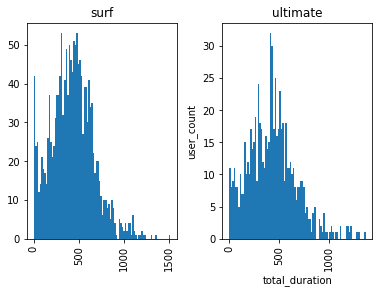

In [65]:
df.hist('total_duration', by='plan', bins=90)
plt.xlabel('total_duration')
plt.ylabel('user_count')

Dilihat dari histogram, pengguna paket surf menggunakan durasi telepon lebih banyak berada di sekitar 500 menit per bulan dan berjumlah sekitar 40-50 orang. Hal yang sama dapat dilihat pada pengguna paket ultimate, walaupun jumlah pengguna telepon dengan durasi 500 menit lebih sedikit yaitu sekitar 15-30 orang.

#### Histogram Total Internet (GB)

Text(0, 0.5, 'user_count')

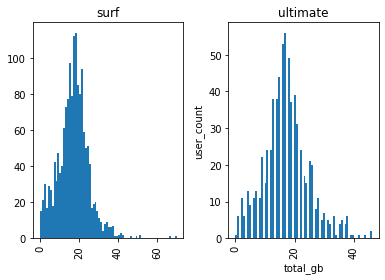

In [66]:
df.hist('total_gb', by='plan', bins=70)
plt.xlabel('total_gb')
plt.ylabel('user_count')

Dari histogram diatas, dapat dilihat bahwa pada kedua pengguna paket surf dan ultimate, sama-sama menggunakan jumlah kuota internet terbanyak di angka sekitar 20 GB.

#### Histogram Total SMS

Text(0, 0.5, 'user_count')

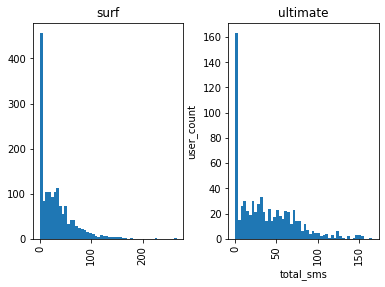

In [67]:
df.hist('total_sms', by='plan', bins=50)
plt.xlabel('total_sms')
plt.ylabel('user_count')

Jumlah pengguna paket surf yang mengirimkan jumlah sms lebih dari batas paket terlihat lebih banyak dibandingkan jumlah pengguna paket ultimate. Total sms yang lebih mencapai jumlah terbanyak di angka sekitar 50 sms. Pada pengguna paket ultimate, dengan jumlah total sms 50, ada sekitar 20 orang saja.

## Tahap 3. Menguji Hipotesis
### Hipotesis Pengguna Paket Surf dan Ultimate

- H0 (Null Hypothesis) : Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf SAMA.
- H1 (Alternative Hypothesis) : Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf BERBEDA.

In [68]:
alpha = 0.05

results = st.ttest_ind(df.query('plan == "surf"')['total_revenue'], df.query('plan == "ultimate"')['total_revenue'], equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  2.8395132655505893e-08
We reject the null hypothesis


Hasil yang didapat dari hipotesis diatas adalah rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf sama adalah TIDAK BENAR.
Pernyataan yang benar adalah hipotesis alternatif, yaitu rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf BERBEDA.

### Hipotesis Wilayah NY-NJ
- H0 (Null Hypothesis) : Rata-rata pendapatan dari pengguna di wilayah NY-NJ SAMA dengan pendapatan pengguna dari wilayah lain.
- H1 (Alternative Hypothesis) : Rata-rata pendapatan dari pengguna di wilayah NY-NJ BERBEDA dengan pendapatan pengguna dari wilayah lain.

In [69]:
# memfilter kota NY dan NJ
ny_nj = df[df['city'].str.contains('NY', 'NJ')]
ny_nj.head()

,index,user_id,year_month,call_count,total_duration,total_mb,total_gb,total_sms,first_name,last_name,...,plan_y,plan,add_duration,add_internet,add_sms,duration_charge,internet_charge,sms_charge,additional_charge,total_revenue
56,56,1014,2018-11,28.0,163.0,1175.59,2.0,9.0,Edmundo,Simon,...,surf,surf,0.0,0.0,0.0,0.00,0.0,0.00,0.00,20.00
57,57,1014,2018-12,150.0,1114.0,7792.41,8.0,64.0,Edmundo,Simon,...,surf,surf,614.0,0.0,14.0,18.42,0.0,0.42,18.84,38.84
75,75,1022,2018-05,39.0,302.0,4908.08,5.0,0.0,Bo,Snow,...,surf,surf,0.0,0.0,0.0,0.00,0.0,0.00,0.00,20.00
76,76,1022,2018-06,76.0,490.0,23436.48,23.0,0.0,Bo,Snow,...,surf,surf,0.0,8.0,0.0,0.00,80.0,0.00,80.00,100.00
77,77,1022,2018-07,70.0,475.0,9933.15,10.0,0.0,Bo,Snow,...,surf,surf,0.0,0.0,0.0,0.00,0.0,0.00,0.00,20.00


In [70]:
# memfilter kota selain NY dan NJ
not_ny_nj = df[~df['city'].str.contains('NY', 'NJ')]
not_ny_nj.head()

,index,user_id,year_month,call_count,total_duration,total_mb,total_gb,total_sms,first_name,last_name,...,plan_y,plan,add_duration,add_internet,add_sms,duration_charge,internet_charge,sms_charge,additional_charge,total_revenue
0,0,1000,2018-12,16.0,124.0,1901.47,2.0,11.0,Anamaria,Bauer,...,ultimate,ultimate,0.0,0.0,0.0,0.0,0.0,0.00,0.00,70.00
1,1,1001,2018-08,27.0,182.0,6919.15,7.0,30.0,Mickey,Wilkerson,...,surf,surf,0.0,0.0,0.0,0.0,0.0,0.00,0.00,20.00
2,2,1001,2018-09,49.0,315.0,13314.82,14.0,44.0,Mickey,Wilkerson,...,surf,surf,0.0,0.0,0.0,0.0,0.0,0.00,0.00,20.00
3,3,1001,2018-10,65.0,393.0,22330.49,22.0,53.0,Mickey,Wilkerson,...,surf,surf,0.0,7.0,3.0,0.0,70.0,0.09,70.09,90.09
4,4,1001,2018-11,64.0,426.0,18504.30,19.0,36.0,Mickey,Wilkerson,...,surf,surf,0.0,4.0,0.0,0.0,40.0,0.00,40.00,60.00


In [72]:
alpha = 0.05

results = st.ttest_ind(df[df['city'].str.contains('NY', 'NJ')]['total_revenue'], df[~df['city'].str.contains('NY', 'NJ')]['total_revenue'], equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.10067540939518493
We can't reject the null hypothesis


Hasil yang didapat dari uji hipotesis diatas yaitu rata-rata pendapatan dari pengguna di wilayah NY-NJ SAMA dengan pendapatan pengguna dari wilayah lain adalah BENAR.

## Kesimpulan

Setelah melalui proses pembersihan dan perhitungan data, berikut kesimpulan yang didapat :
1. Jumlah pengguna paket surf yang menggunakan durasi telepon lebih banyak berada di sekitar 500 menit per bulan dan berjumlah sekitar 40-50 orang. Sedangkan pada pengguna paket ultimate, jumlah pengguna telepon dengan durasi 500 menit lebih sedikit yaitu sekitar 15-30 orang.
2. Kedua pengguna paket surf dan ultimate, sama-sama menggunakan jumlah kuota internet terbanyak di angka sekitar 20 GB per bulan.
3. Jumlah pengguna paket surf yang mengirimkan jumlah sms lebih dari batas paket lebih banyak yaitu di angka sekitar 50 sms per bulan, dibandingkan jumlah pengguna paket ultimate dengan jumlah total sms 50, ada sekitar 20 orang saja.
4. Melihat dari nilai total revenue kedua paket (paket surf 590.37 dan paket ultimate 182.16), memiliki selisih yang banyak dan paket surf lebih unggul 408.21$ dari segi pendapatan. Ini berarti paket surf lebih mendatangkan keuntungan dibanding paket ultimate.